In [1]:
%pip install ta
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import timedelta
from sklearn.preprocessing import RobustScaler
plt.style.use("bmh")

# Technical Analysis library
import ta

# Neural Network library
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout



Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.


In [2]:
## Scaling

# Scale fitting the close prices separately for inverse_transformations purposes later
close_scaler = RobustScaler()


# Normalizing/Scaling the DF
scaler = RobustScaler()

def set_up_data(data_source):
    # Loading in the Data
    df = pd.read_csv(data_source)

    ## Datetime conversion
    df['Date'] = pd.to_datetime(df.Date)

    # Setting the index
    df.set_index('Date', inplace=True)

    # Dropping any NaNs
    df.dropna(inplace=True)



    ## Technical Indicators
    


    # Adding all the indicators
    df = ta.add_all_ta_features(df, open="Open", high="High", low="Low", close="Close", volume="Volume", fillna=True)

    # Dropping everything else besides 'Close' and the Indicators
    df.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1, inplace=True)

    # Only using the last 1000 days of data to get a more accurate representation of the current market climate
    df = df.tail(1000)

    close_scaler.fit(df[['Close']])

    

    df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)
    return df

set_up_data("AAPL.csv")

/home/hw013/.local/lib/python3.7/site-packages/ta/trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
/home/hw013/.local/lib/python3.7/site-packages/ta/trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


,Close,volume_adi,volume_obv,volume_cmf,volume_fi,volume_mfi,volume_em,volume_sma_em,volume_vpt,volume_nvi,...,momentum_wr,momentum_ao,momentum_kama,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,others_dr,others_dlr,others_cr
Date,,,,,,,,,,,,,,,,,,,,,
2020-04-13,-1.564782,-2.146048,-1.626505,4.567587,-0.242469,-0.169383,-0.096075,-0.340734,-10.813942,-0.756398,...,0.435042,-0.443823,-1.513657,-0.394869,0.072748,-0.010231,0.056670,-15.325945,-0.067552,-1.564782
2020-04-14,-1.452331,-1.935552,-1.529968,4.183968,5.022674,2.448557,0.805562,3.216072,-8.740860,-0.756398,...,0.442116,-0.443823,-1.486431,-0.394869,0.434190,0.077075,0.618588,1.953815,1.916025,-1.452331
2020-04-15,-1.473680,-1.873838,-1.594899,3.453693,4.174462,0.345946,-0.077606,1.474098,1.761327,-0.776672,...,0.216018,-0.443823,-1.471950,-0.394869,0.353258,0.127371,0.380384,-0.432455,-0.436704,-1.473680
2020-04-16,-1.455264,-1.766537,-1.517111,3.193438,3.642730,1.032087,-0.010013,0.982321,-0.090776,-0.776672,...,0.411050,-0.443823,-1.456012,-0.394869,0.428818,0.185859,0.433110,0.250769,0.251080,-1.455264
2020-04-17,-1.486962,-1.712633,-1.623675,2.575355,2.853653,-0.137718,-0.299506,0.450932,-0.461994,-0.776672,...,0.075353,-0.443823,-1.451604,-0.394869,0.781920,0.317941,0.906775,-0.610190,-0.617568,-1.486962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-05,0.312256,-0.315147,-0.112408,-0.567782,0.178105,0.007352,0.823191,0.000000,0.460666,1.111564,...,0.240182,-0.604646,0.181107,-0.282311,-0.574734,-0.438675,-0.512205,0.876304,0.870650,0.312256
2021-04-06,0.322360,-0.342676,-0.072717,-0.264262,0.145811,-0.052701,0.579067,-0.285393,0.390841,1.121633,...,0.330438,-0.435320,0.185590,0.185631,-0.671958,-0.532869,-0.549580,0.031332,0.031456,0.322360
2021-04-07,0.377445,-0.226545,-0.031395,-0.189546,0.248056,0.321760,0.000000,0.084612,0.181387,1.121633,...,0.541403,-0.219556,0.200669,0.417177,-0.717417,-0.619205,-0.499003,0.468650,0.467968,0.377445


In [3]:
df = set_up_data("AAPL.csv")

/home/hw013/.local/lib/python3.7/site-packages/ta/trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
/home/hw013/.local/lib/python3.7/site-packages/ta/trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


In [4]:
def split_sequence(seq, n_steps_in, n_steps_out):
    """
    Splits the multivariate time sequence
    """
    
    # Creating a list for both variables
    X, y = [], []
    
    for i in range(len(seq)):
        
        # Finding the end of the current sequence
        end = i + n_steps_in
        out_end = end + n_steps_out
        
        # Breaking out of the loop if we have exceeded the dataset's length
        if out_end > len(seq):
            break
        
        # Splitting the sequences into: x = past prices and indicators, y = prices ahead
        seq_x, seq_y = seq[i:end, :], seq[end:out_end, 0]
        
        X.append(seq_x)
        y.append(seq_y)
    
    return np.array(X), np.array(y)
  
def visualize_training_results(results):
    """
    Plots the loss and accuracy for the training and testing data
    """
    history = results.history
    plt.figure(figsize=(16,5))
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure(figsize=(16,5))
    plt.plot(history['val_accuracy'])
    plt.plot(history['accuracy'])
    plt.legend(['val_accuracy', 'accuracy'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()
    
    
def layer_maker(n_layers, n_nodes, activation, drop=None, d_rate=.5):
    """
    Creates a specified number of hidden layers for an RNN
    Optional: Adds regularization option - the dropout layer to prevent potential overfitting (if necessary)
    """
    
    # Creating the specified number of hidden layers with the specified number of nodes
    for x in range(1,n_layers+1):
        model.add(LSTM(n_nodes, activation=activation, return_sequences=True))

        # Adds a Dropout layer after every Nth hidden layer (the 'drop' variable)
        try:
            if x % drop == 0:
                model.add(Dropout(d_rate))
        except:
            pass
          
def validater(n_per_in, n_per_out):
    """
    Runs a 'For' loop to iterate through the length of the DF and create predicted values for every stated interval
    Returns a DF containing the predicted values for the model with the corresponding index values based on a business day frequency
    """
    
    # Creating an empty DF to store the predictions
    predictions = pd.DataFrame(index=df.index, columns=[df.columns[0]])

    for i in range(n_per_in, len(df)-n_per_in, n_per_out):
        # Creating rolling intervals to predict off of
        x = df[-i - n_per_in:-i]

        # Predicting using rolling intervals
        yhat = model.predict(np.array(x).reshape(1, n_per_in, n_features))

        # Transforming values back to their normal prices
        yhat = close_scaler.inverse_transform(yhat)[0]

        # DF to store the values and append later, frequency uses business days
        pred_df = pd.DataFrame(yhat, 
                               index=pd.date_range(start=x.index[-1], 
                                                   periods=len(yhat), 
                                                   freq="B"),
                               columns=[x.columns[0]])

        # Updating the predictions DF
        predictions.update(pred_df)
        
    return predictions


def val_rmse(df1, df2):
    """
    Calculates the root mean square error between the two Dataframes
    """
    df = df1.copy()
    
    # Adding a new column with the closing prices from the second DF
    df['close2'] = df2.Close
    
    # Dropping the NaN values
    df.dropna(inplace=True)
    
    # Adding another column containing the difference between the two DFs' closing prices
    df['diff'] = df.Close - df.close2
    
    # Squaring the difference and getting the mean
    rms = (df[['diff']]**2).mean()
    
    # Returning the sqaure root of the root mean square
    return float(np.sqrt(rms))

In [5]:
# How many periods looking back to learn
n_per_in  = 90
# How many periods to predict
n_per_out = 30
# Features 
n_features = df.shape[1]
# Splitting the data into appropriate sequences
X, y = split_sequence(df.to_numpy(), n_per_in, n_per_out)
# Instatiating the model
model = Sequential()

In [6]:

def create_NeuralNetwork(model,X,y,n_per_in,n_per_out,n_features):
    ## Creating the NN

    # Activation
    activ = "tanh"

    # Input layer
    model.add(LSTM(90, 
               activation=activ, 
               return_sequences=True, 
               input_shape=(n_per_in, n_features)))

    # Hidden layers
    layer_maker(n_layers=1, 
            n_nodes=30, 
            activation=activ)

    # Final Hidden layer
    model.add(LSTM(60, activation=activ))

    # Output layer
    model.add(Dense(n_per_out))

    # Model summary
    model.summary()

    # Compiling the data with selected specifications
    model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

    # Fitting and Training
    res = model.fit(X, y, epochs=50, batch_size=128, validation_split=0.1)
    return res

res = create_NeuralNetwork(model,X,y,n_per_in, n_per_out, n_features)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 90, 90)            63000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 90, 30)            14520     
_________________________________________________________________
lstm_2 (LSTM)                (None, 60)                21840     
_________________________________________________________________
dense (Dense)                (None, 30)                1830      
Total params: 101,190
Trainable params: 101,190
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
1/1 [==============================] - 1s 541ms/step - loss: 0.1376 - accuracy: 0.0593 - val_loss: 0.0723 - val_accuracy: 0.0000e+00
Epoch 2/50
1/1 [==============================] - 0s 19ms/step - loss: 0.1261 - accuracy: 0.0508 - val_l

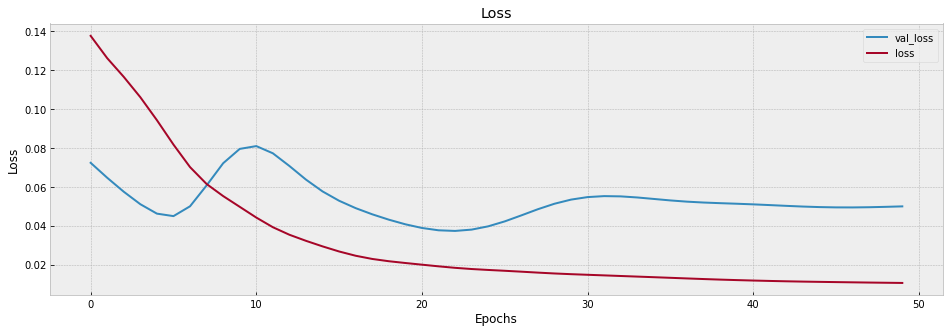

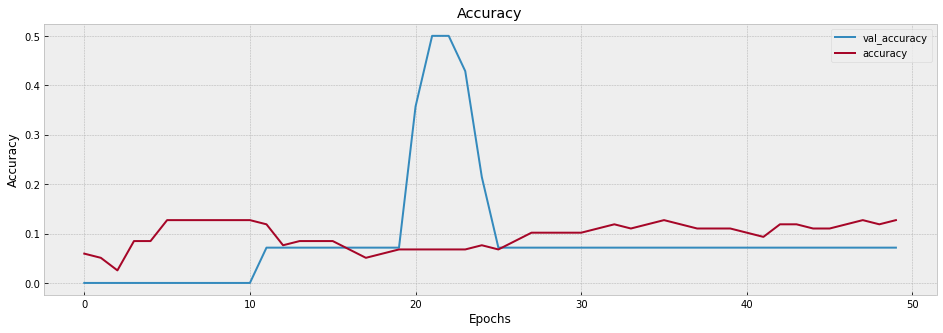

In [7]:
visualize_training_results(res)

RMSE: 3.0760518655791977


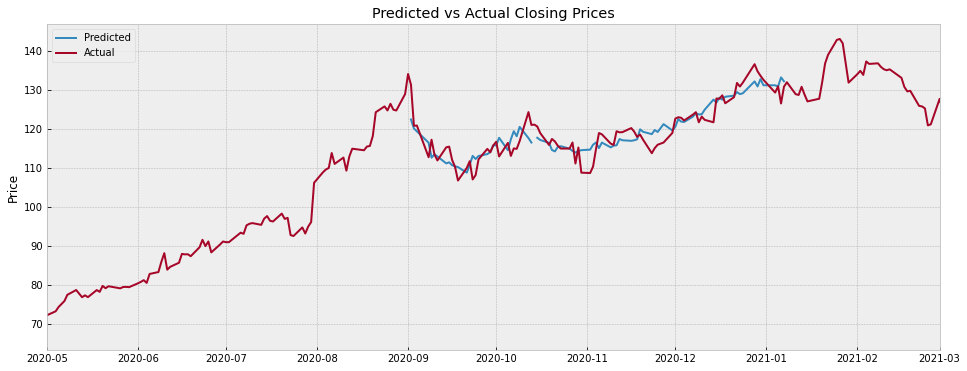

In [8]:
def predictionVSactual(df):
    # Transforming the actual values to their original price
    actual = pd.DataFrame(close_scaler.inverse_transform(df[["Close"]]), 
                      index=df.index, 
                      columns=[df.columns[0]])

    # Getting a DF of the predicted values to validate against
    predictions = validater(n_per_in, n_per_out)

    # Printing the RMSE
    print("RMSE:", val_rmse(actual, predictions))
    
    # Plotting
    plt.figure(figsize=(16,6))

    # Plotting those predictions
    plt.plot(predictions, label='Predicted')

    # Plotting the actual values
    plt.plot(actual, label='Actual')

    plt.title(f"Predicted vs Actual Closing Prices")
    plt.ylabel("Price")
    plt.legend()
    plt.xlim('2020-05', '2021-03')
    plt.show()

predictionVSactual(df)

                 Close
2021-04-12  124.554680
2021-04-13  122.007172
2021-04-14  125.771828
2021-04-15  122.877014
2021-04-16  126.019119
2021-04-19  117.650536
2021-04-20  124.261398
2021-04-21  122.382492
2021-04-22  121.208687
2021-04-23  121.458145
2021-04-26  125.208801
2021-04-27  122.636215
2021-04-28  124.145409
2021-04-29  122.061989
2021-04-30  128.137054
2021-05-03  130.901505
2021-05-04  127.464409
2021-05-05  123.502129
2021-05-06  123.621422
2021-05-07  124.733452
2021-05-10  128.065796
2021-05-11  125.038933
2021-05-12  125.628181
2021-05-13  123.701851
2021-05-14  127.999306
2021-05-17  127.252640
2021-05-18  128.645447
2021-05-19  126.660919
2021-05-20  129.247147
2021-05-21  128.305984


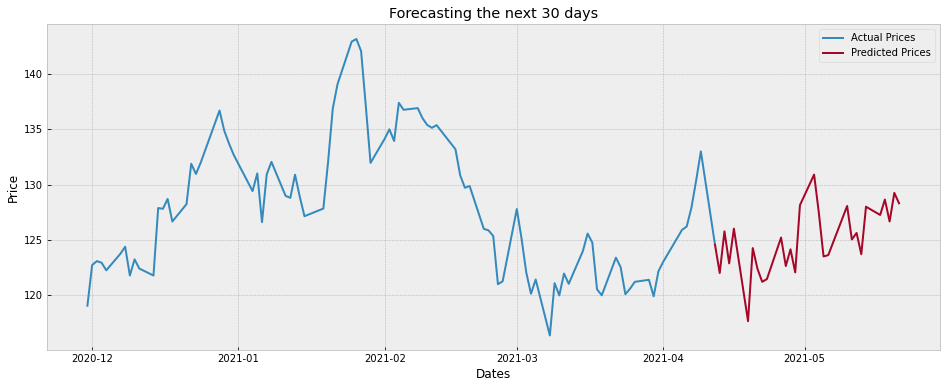

In [9]:
def forecastFuture(df):
    # Predicting off of the most recent days from the original DF
    yhat = model.predict(np.array(df.tail(n_per_in)).reshape(1, n_per_in, n_features))

    # Transforming the predicted values back to their original format
    yhat = close_scaler.inverse_transform(yhat)[0]

    # Creating a DF of the predicted prices
    preds = pd.DataFrame(yhat, 
                     index=pd.date_range(start=df.index[-1]+timedelta(days=1), 
                                         periods=len(yhat), 
                                         freq="B"), 
                     columns=[df.columns[0]])

    # Number of periods back to plot the actual values
    pers = n_per_in

    # Transforming the actual values to their original price
    actual = pd.DataFrame(close_scaler.inverse_transform(df[["Close"]].tail(pers)), 
                      index=df.Close.tail(pers).index, 
                      columns=[df.columns[0]]).append(preds.head(1))

    # Printing the predicted prices
    print(preds)

    # Plotting
    plt.figure(figsize=(16,6))
    plt.plot(actual, label="Actual Prices")
    plt.plot(preds, label="Predicted Prices")
    plt.ylabel("Price")
    plt.xlabel("Dates")
    plt.title(f"Forecasting the next {len(yhat)} days")
    plt.legend()
    plt.show()
    
forecastFuture(df)